<a href="https://colab.research.google.com/github/PreyPython123/Master-V24-Semiveiledet-Regresjon/blob/Variabelunders%C3%B8kelse-Pradeep/Bioco_Variabelunders%C3%B8kelse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importering av nødvendige bibliotek og pakker

In [6]:
import pandas as pd
import numpy as np
import copy

import seaborn as sns
import matplotlib.pyplot as plt

Importering av data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Velger første kolonne med dato og tid som index
behandlet_data = pd.read_csv('/content/drive/MyDrive/MasterV24/Bioco_data/ekstremverdi_data_behandlet_bioco_data.csv',
                             header=0,
                             sep=',',
                             index_col=0)

# Formatterer index til riktig format og datatype
behandlet_data.index = pd.to_datetime(behandlet_data.index,
                                      format='%Y-%m-%d %H:%M:%S')

Mounted at /content/drive


# Dataforståelse av behandlet datasett

Informasjon om antall observasjoner for hver kolonne

In [5]:
behandlet_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29136 entries, 2022-10-31 17:37:00 to 2023-06-14 01:06:00
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   EnzymeType_A1   29136 non-null  int64  
 1   EnzymeType_A2   29136 non-null  int64  
 2   EnzymeType_B    29136 non-null  int64  
 3   EnzymeType_C    29136 non-null  int64  
 4   EnzymeType_D    29136 non-null  int64  
 5   EnzymeType_E    29136 non-null  int64  
 6   RawMatFlow      29136 non-null  float64
 7   NIRfat          29136 non-null  float64
 8   NIRash          29136 non-null  float64
 9   NIRwater        29136 non-null  float64
 10  TT07            29136 non-null  float64
 11  TT08            29136 non-null  float64
 12  PT03            29136 non-null  float64
 13  TT20            29136 non-null  float64
 14  TT09            29136 non-null  float64
 15  TT12            29136 non-null  float64
 16  Collagen        89 non-null     float64
 

## Fordeling i variabler i behandlet datasett

Lager kopi for merinformasjon om tid

In [8]:
behandlet_data_tid = copy.deepcopy(behandlet_data)
behandlet_data_tid['Week'] = behandlet_data.index.week
behandlet_data_tid['Day'] = (behandlet_data_tid.index.weekday + 1)

<ipython-input-8-ce1505e4248b>:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  behandlet_data_tid['Week'] = behandlet_data.index.week


Fordeling i variablene for hele datasettet med uke- og dagsinformasjon

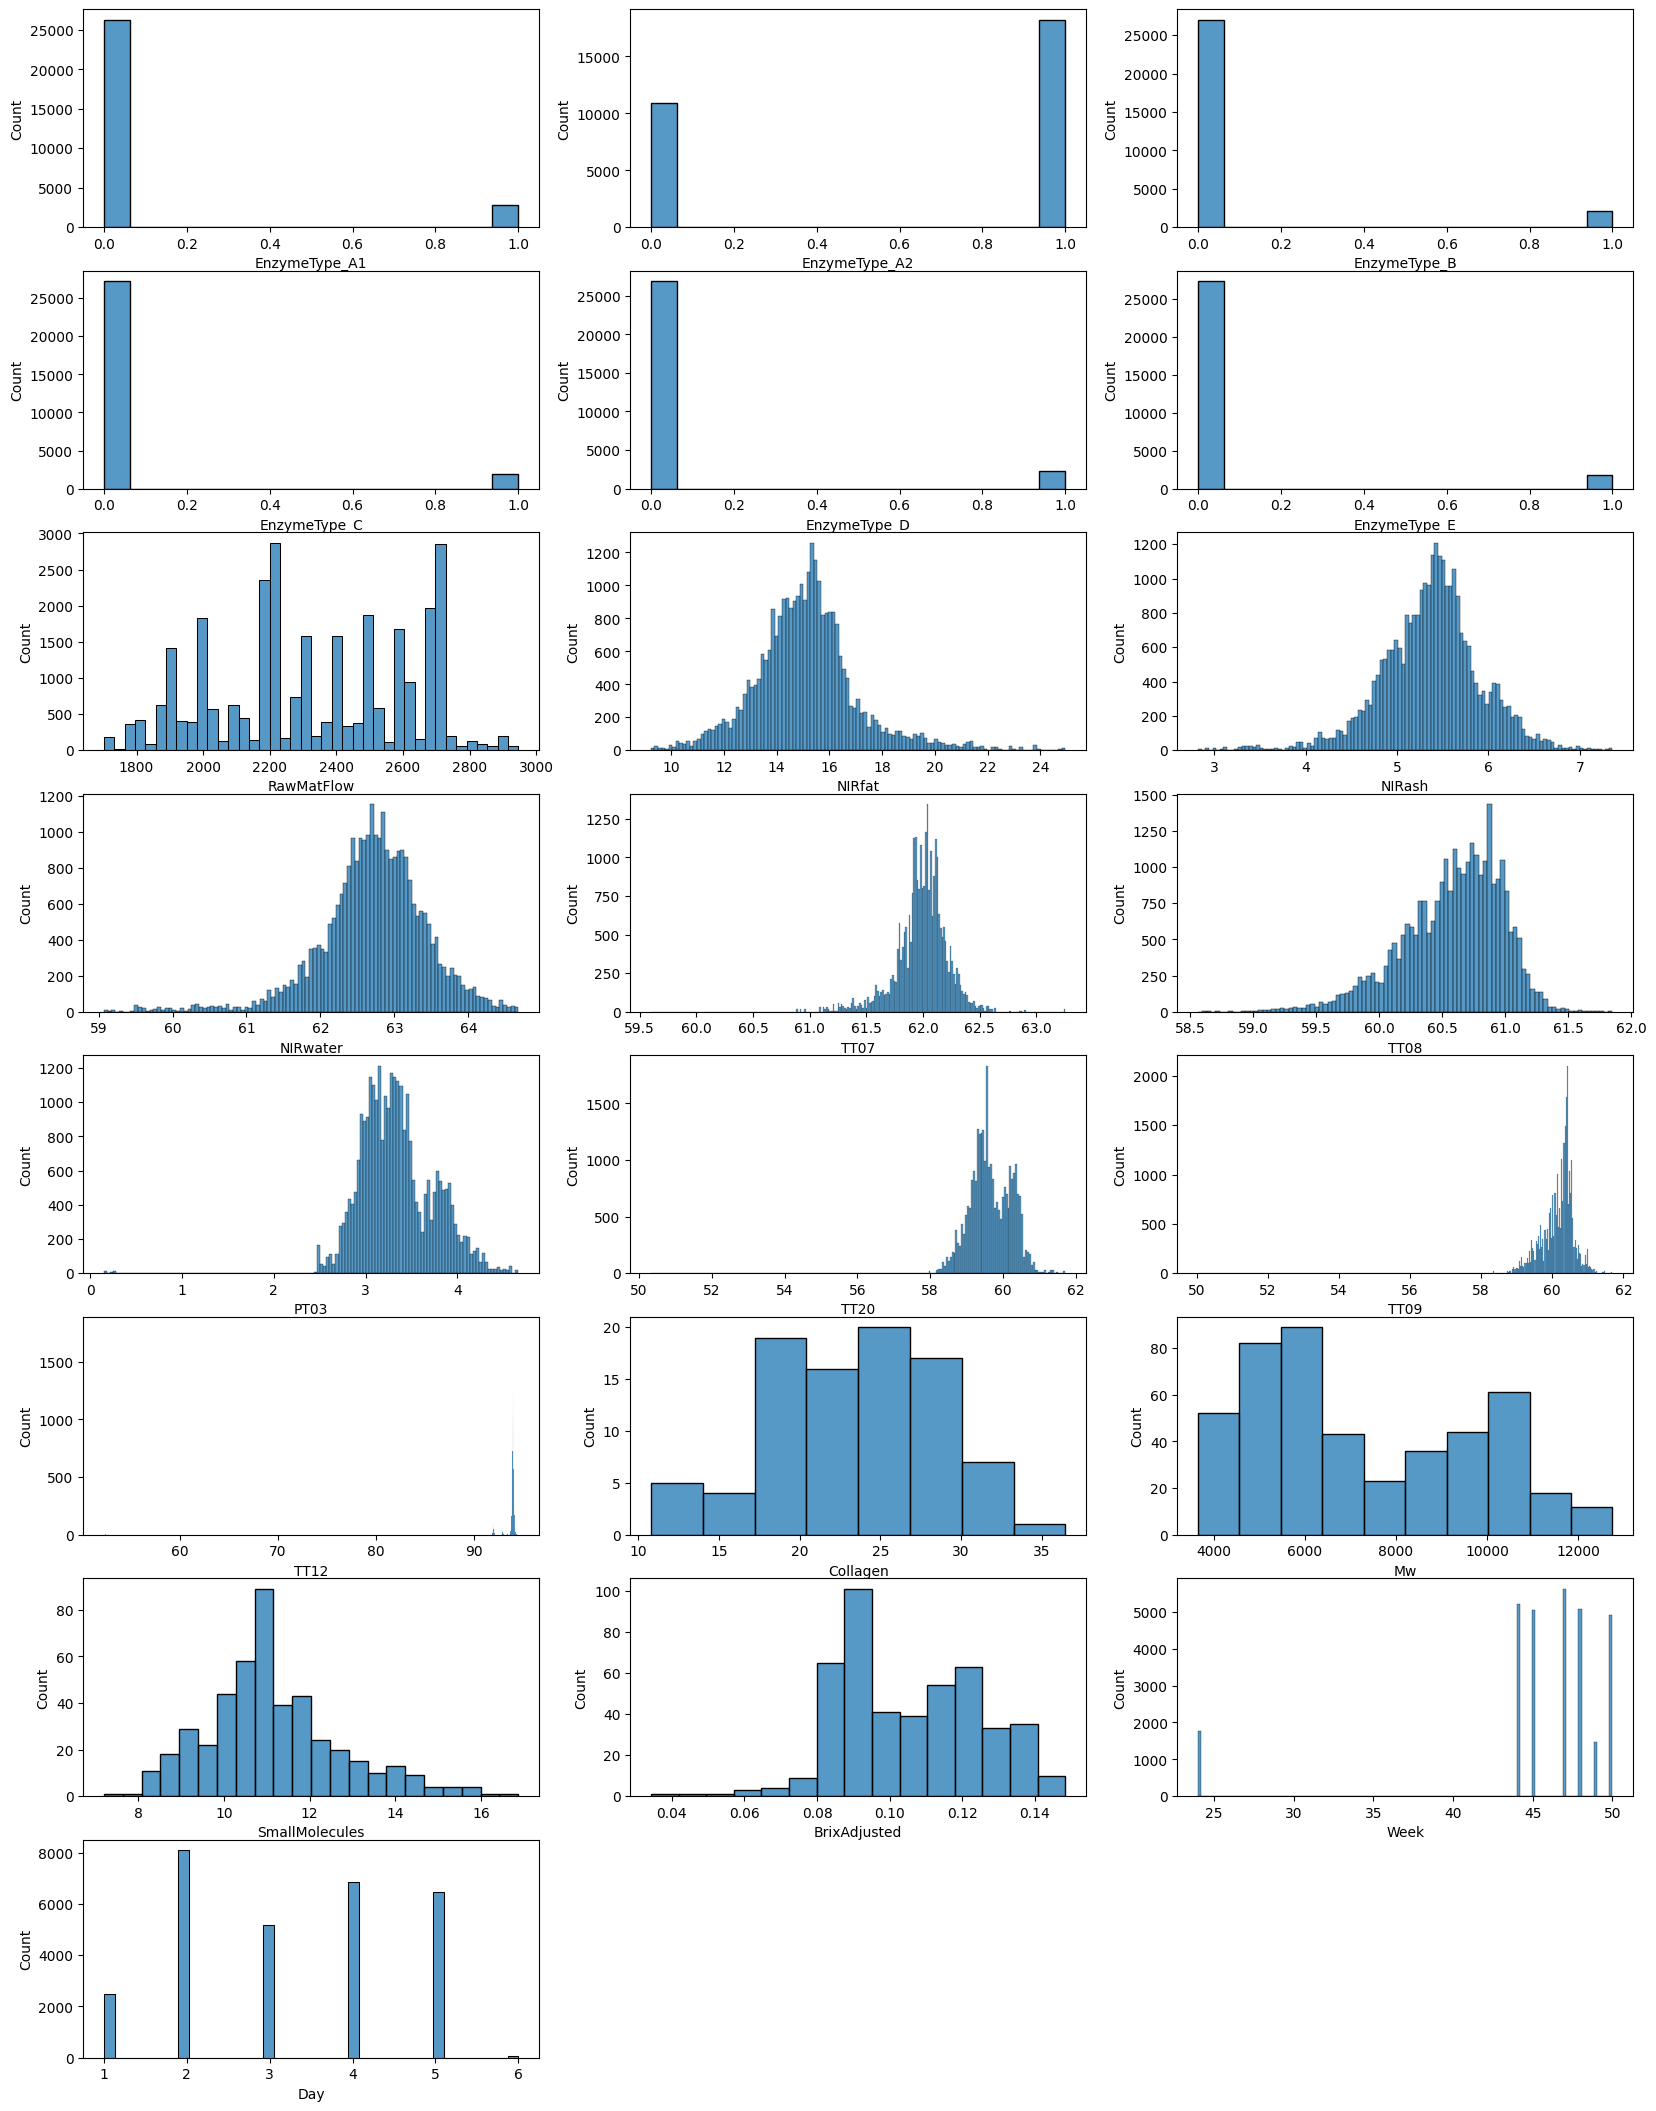

In [9]:
fig = plt.figure(figsize=(20,30))
antall_kolonnner = len(behandlet_data_tid.columns)
rute_nett = fig.add_gridspec(9,3)

n = 0
for nummer, indeks in zip(range(antall_kolonnner), behandlet_data_tid):
  if nummer % 3 == 0:
    n += 1
    i = 0
  ax = fig.add_subplot(rute_nett[n,i])
  sns.histplot(x=indeks, data = behandlet_data_tid)
  i += 1

Fordeling i markert del av datasettet

In [10]:
# Lager et datasett for Collagen med mindre markeringer enn resterende kvalitesmålinger
collagen_markert = behandlet_data_tid.dropna(subset=['Collagen'])

# Lager et datasett for de resterende kvalitetsmålinger
kvalitetsmålinger_markert = behandlet_data_tid.dropna(subset=['Mw',
                                                          'SmallMolecules',
                                                          'BrixAdjusted'])

Fordeling i datasett med Collagen som markert respons

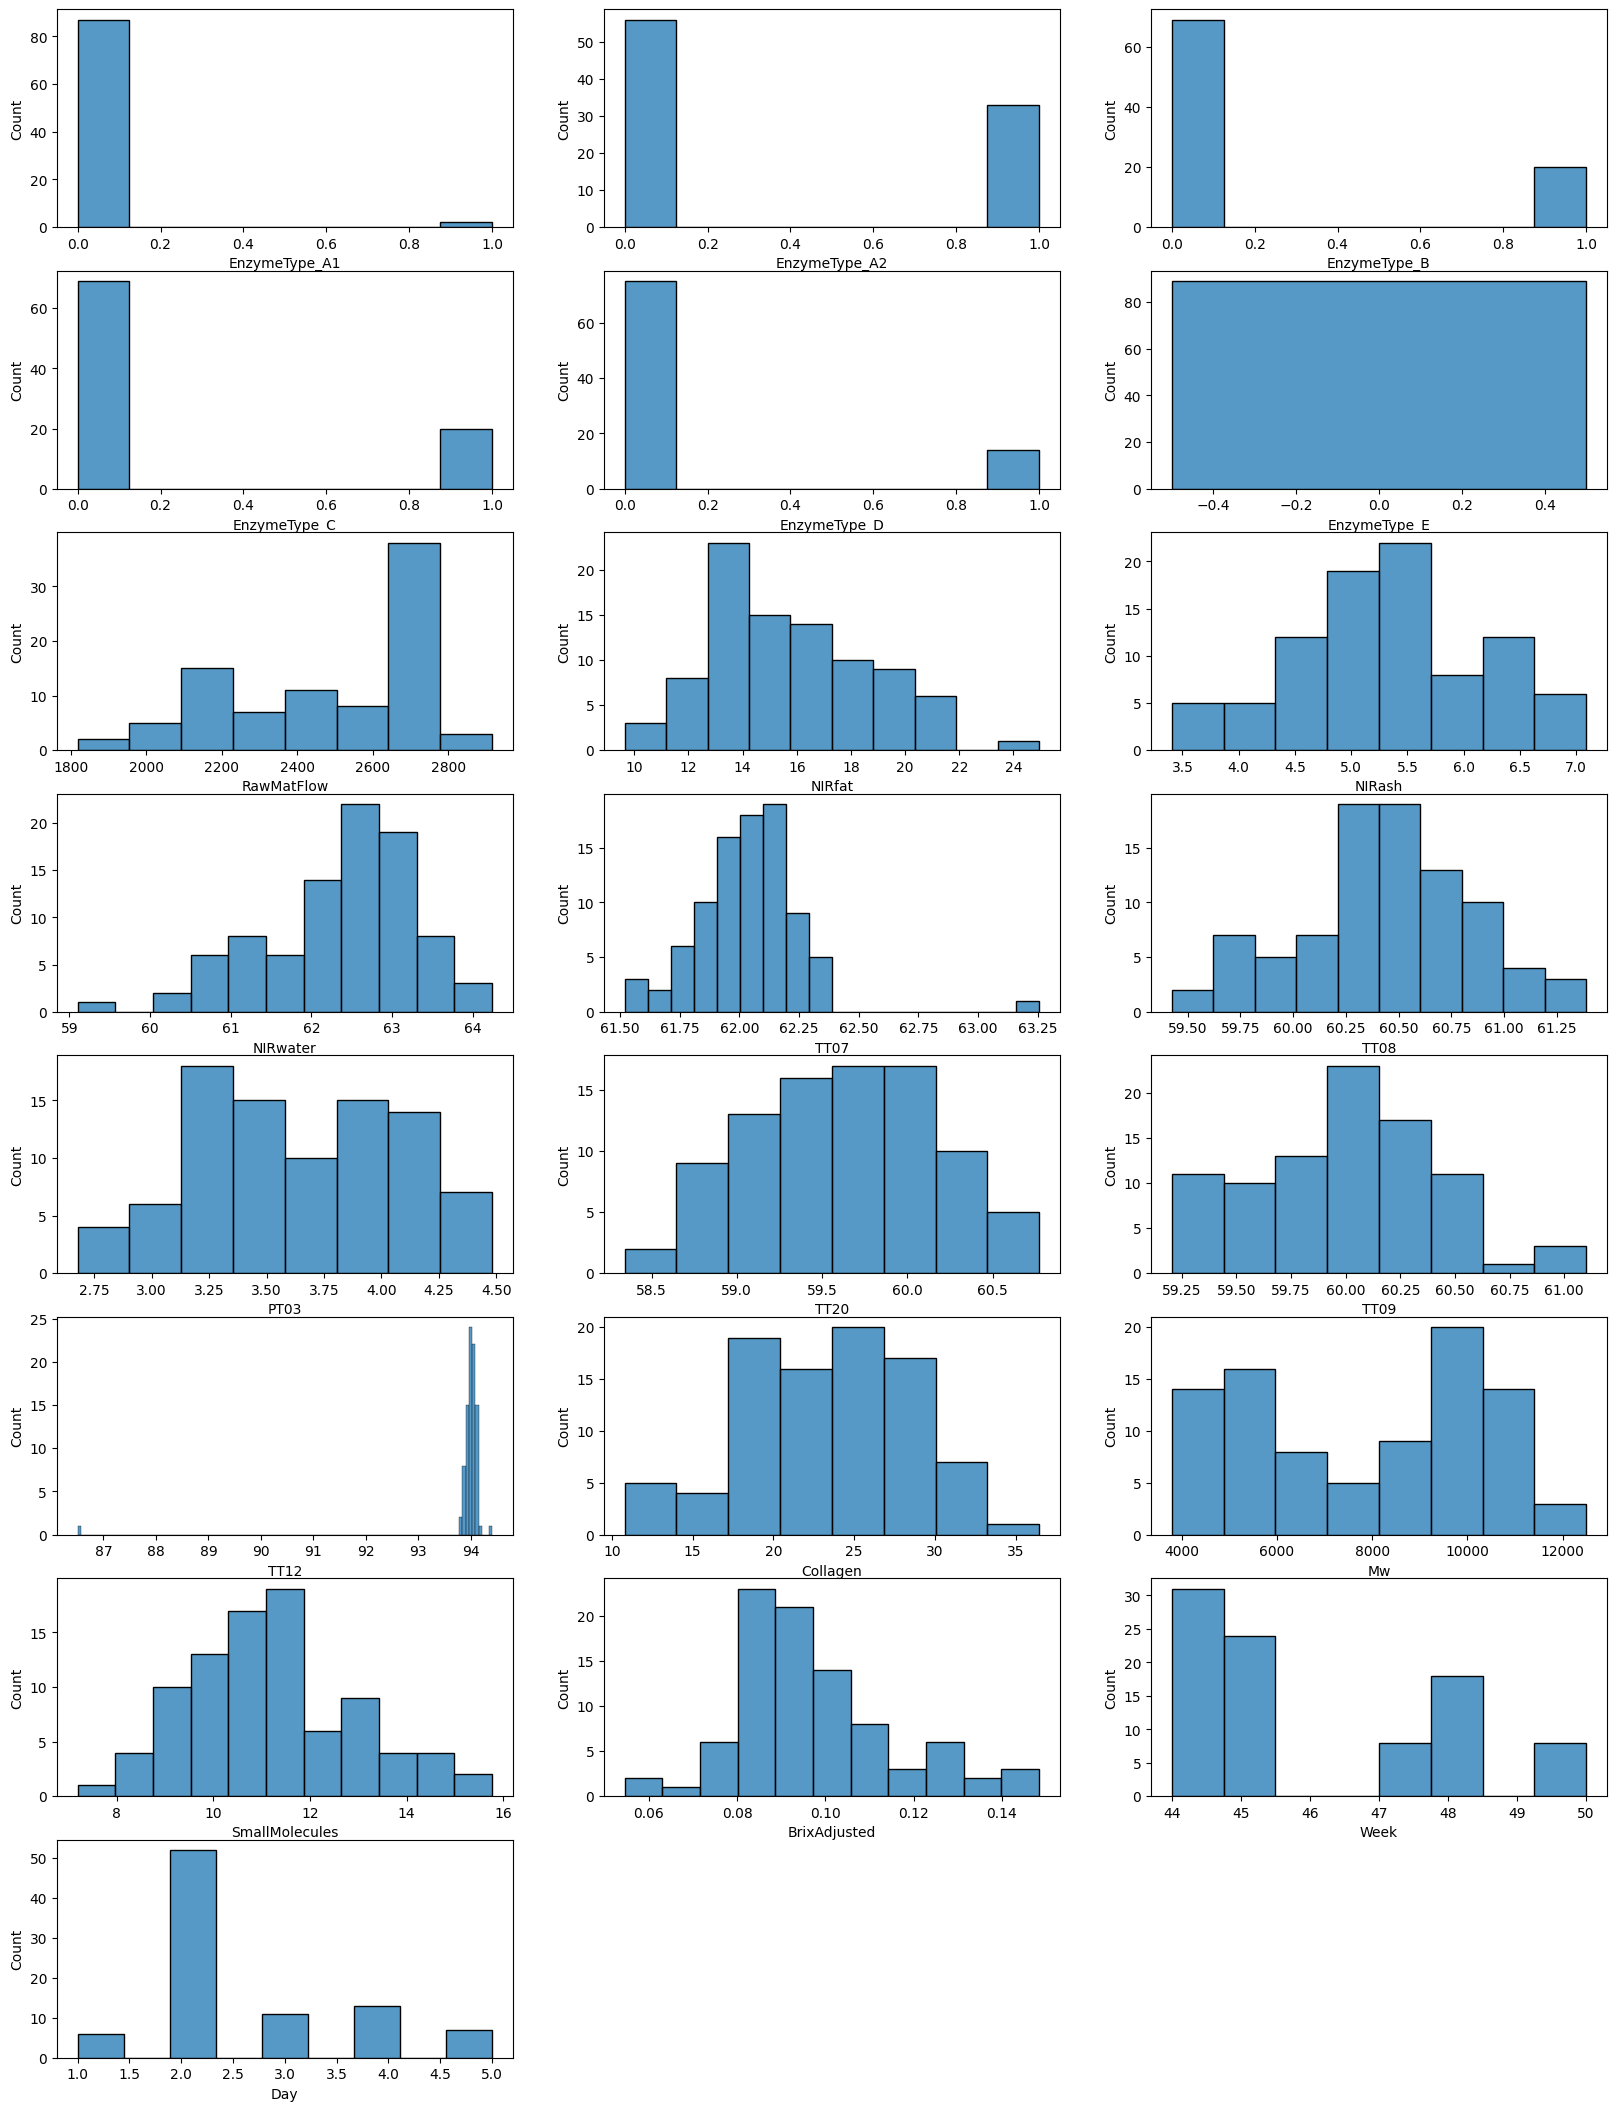

In [11]:
fig = plt.figure(figsize=(20,30))
antall_kolonnner = len(collagen_markert.columns)
rute_nett = fig.add_gridspec(9,3)

n = 0
for nummer, indeks in zip(range(antall_kolonnner), collagen_markert):
  if nummer % 3 == 0:
    n += 1
    i = 0
  ax = fig.add_subplot(rute_nett[n,i])
  sns.histplot(x=indeks, data = collagen_markert)
  i += 1

Fordeling i datasett med resterende kvalitetsmålinger som markert respons

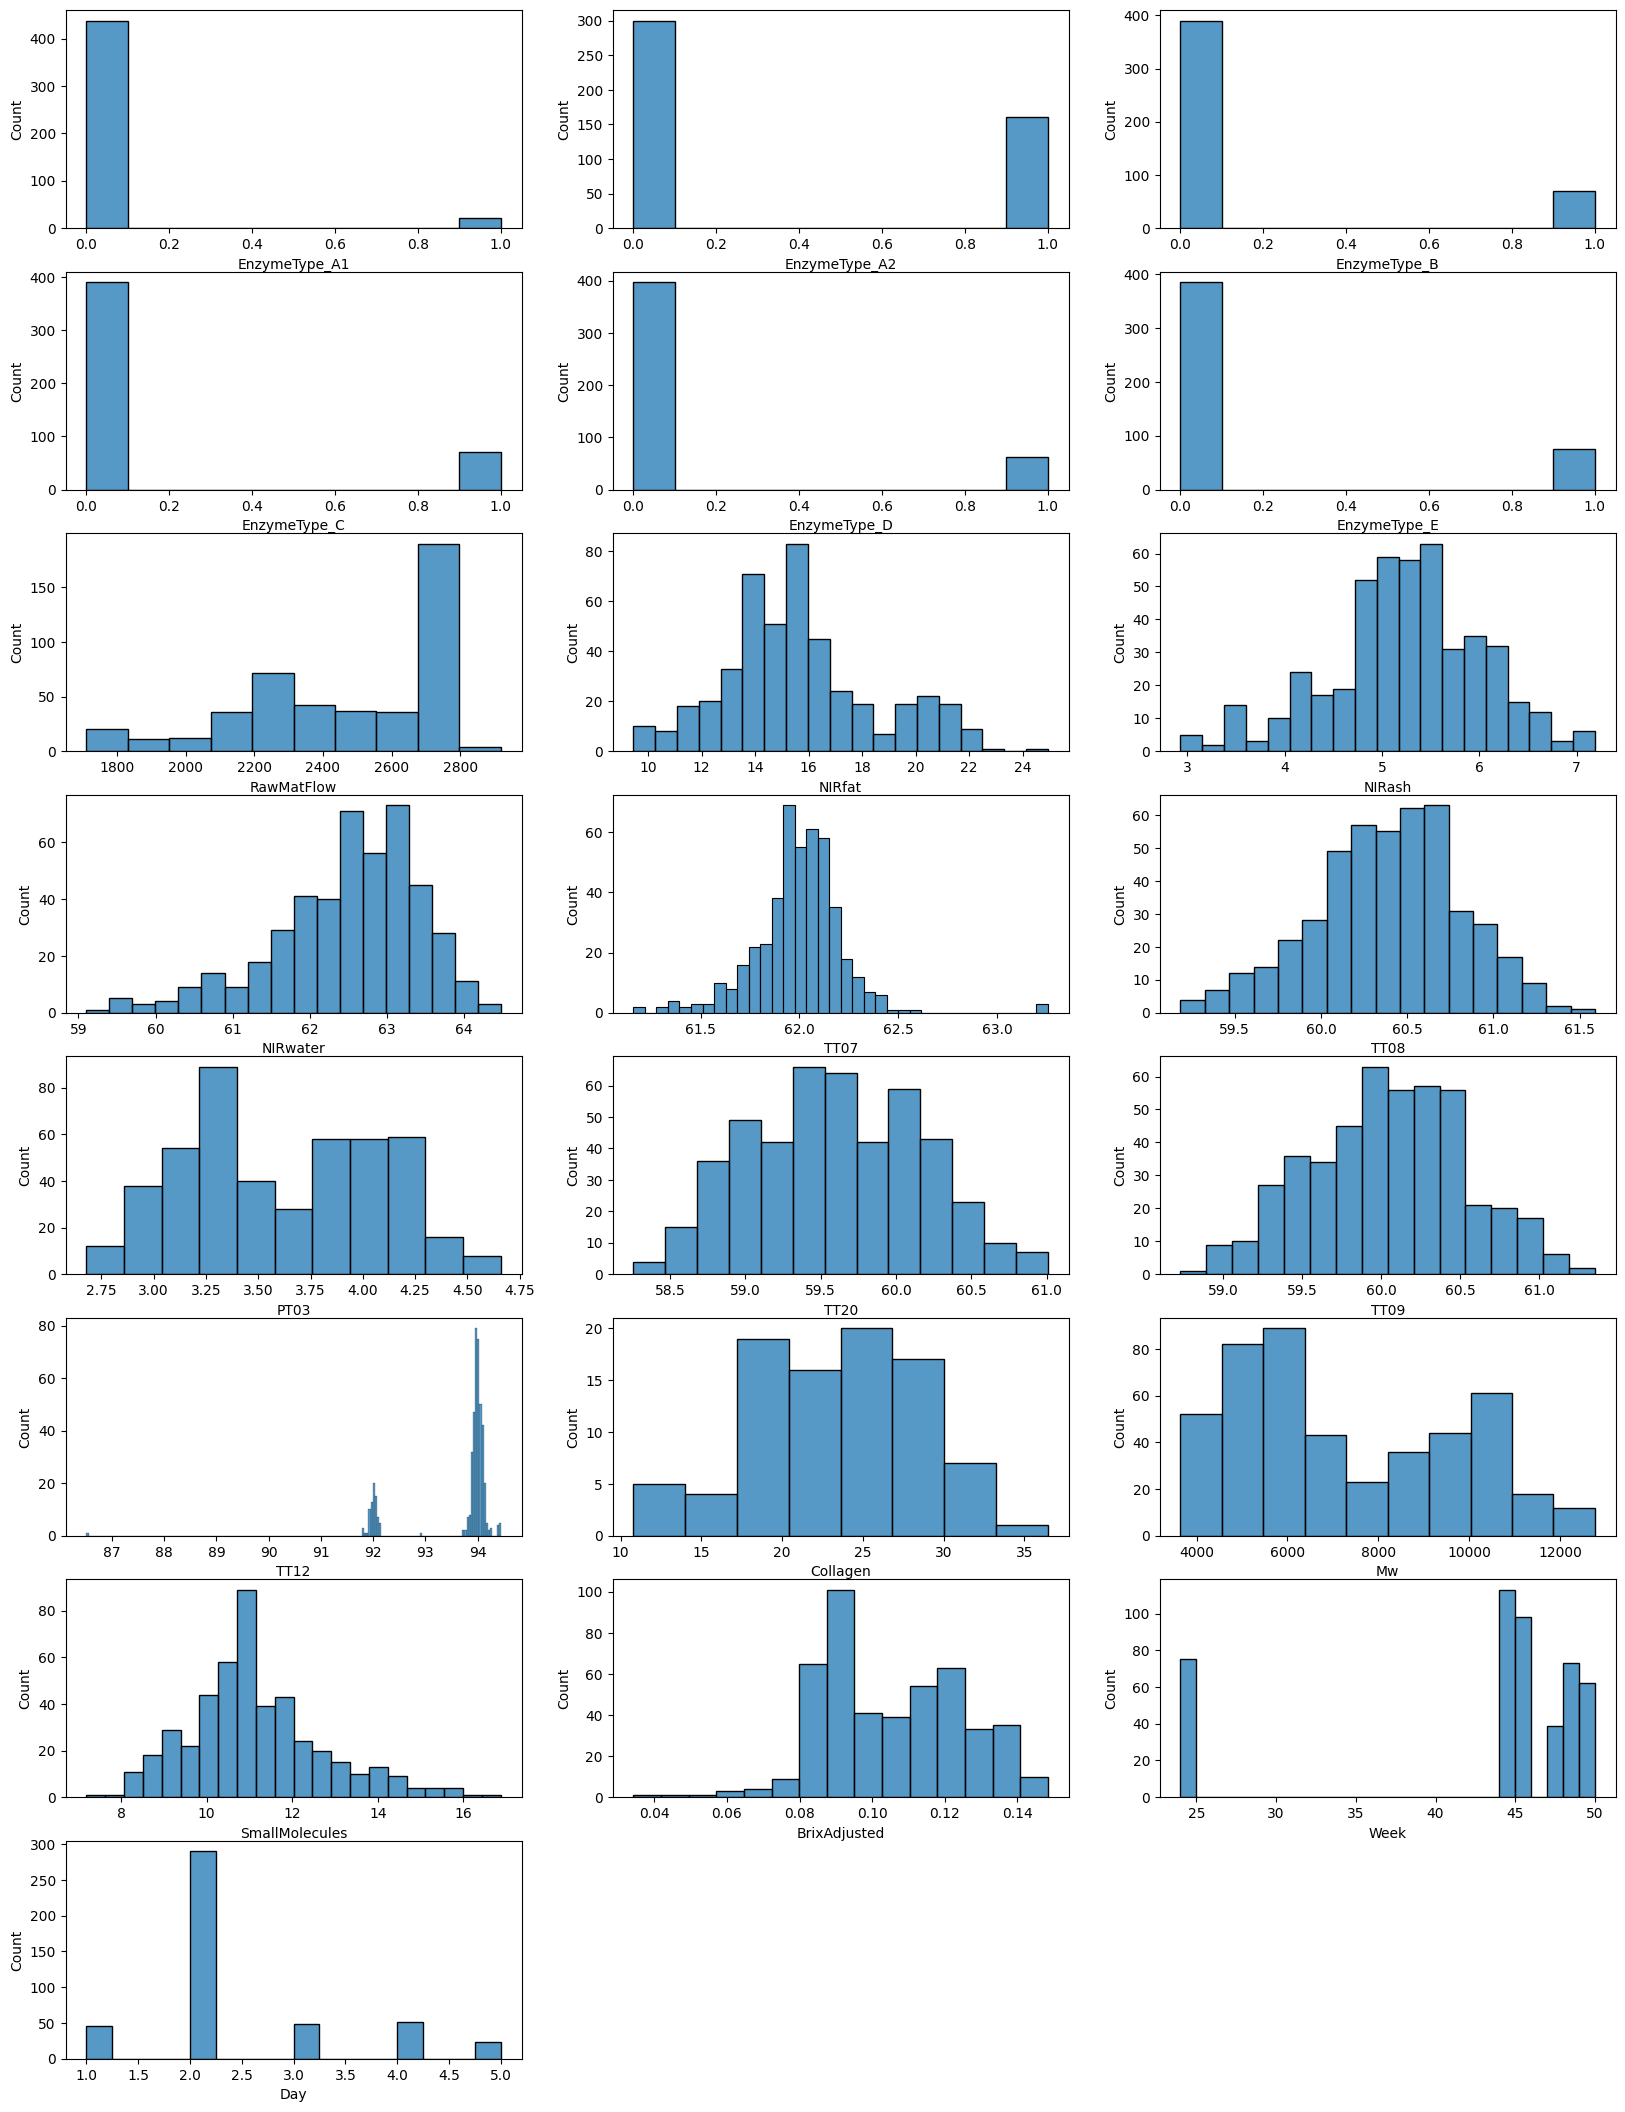

In [12]:
fig = plt.figure(figsize=(20,30))
antall_kolonnner = len(kvalitetsmålinger_markert.columns)
rute_nett = fig.add_gridspec(9,3)

n = 0
for nummer, indeks in zip(range(antall_kolonnner), kvalitetsmålinger_markert):
  if nummer % 3 == 0:
    n += 1
    i = 0
  ax = fig.add_subplot(rute_nett[n,i])
  sns.histplot(x=indeks, data = kvalitetsmålinger_markert)
  i += 1

## Korrelasjon

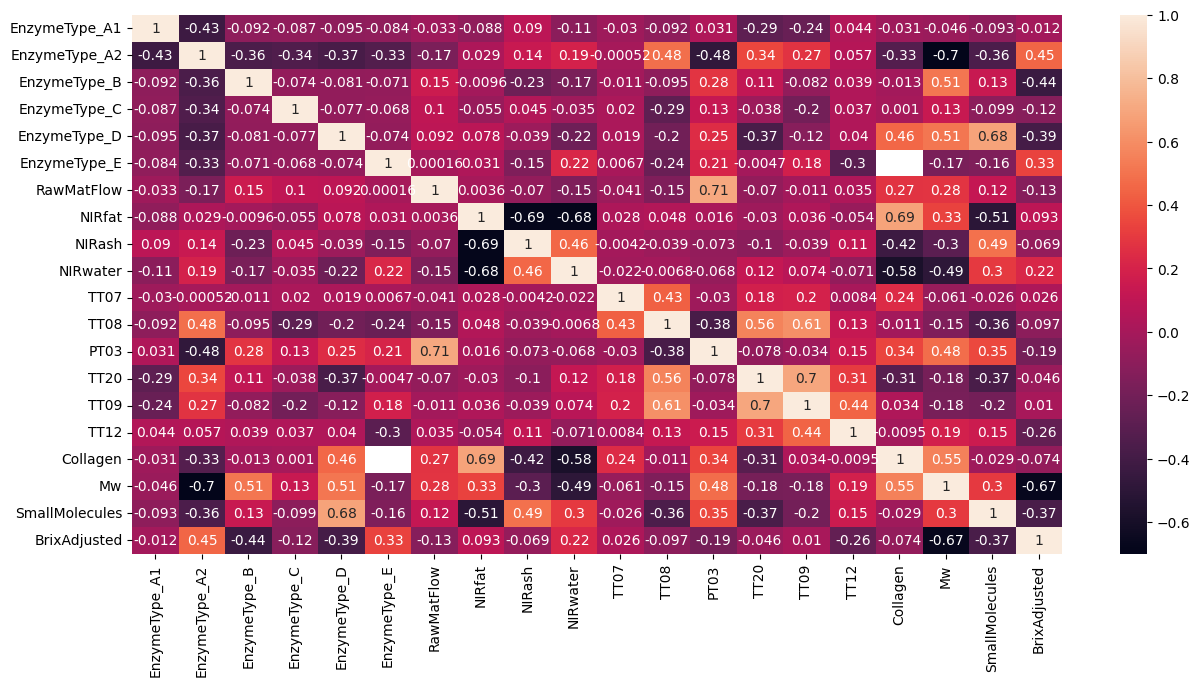

In [13]:
# Lager en korrelasjonsmatrise med annotering
korrelasjon_matrise = behandlet_data.corr()
plt.figure(figsize=(15, 7))
sns.heatmap(korrelasjon_matrise, annot=True)
plt.show()

# Oppdeling av datasett

Oppdeling av data for hver kvalitetsmåling

In [ ]:
# Lager en kopi av datasett for med en kvalitesmåling som respons hver
collagen_data = behandlet_data.drop(columns=['Mw',
                                             'SmallMolecules',
                                             'BrixAdjusted'])

mw_data = behandlet_data.drop(columns=['Collagen',
                                       'SmallMolecules',
                                       'BrixAdjusted'])

smallmoleclues_data = behandlet_data.drop(columns=['Collagen',
                                                   'Mw',
                                                   'BrixAdjusted'])

brixadjusted_data = behandlet_data.drop(columns=['Collagen',
                                                 'Mw',
                                                 'SmallMolecules'])

Lagring av alle datasett som csv filer

In [ ]:
collagen_data.to_csv('/content/drive/MyDrive/MasterV24/Bioco_data/collagen_data.csv')
mw_data.to_csv('/content/drive/MyDrive/MasterV24/Bioco_data/mw_data.csv')
smallmoleclues_data.to_csv('/content/drive/MyDrive/MasterV24/Bioco_data/smallmoleclues_data.csv')
brixadjusted_data.to_csv('/content/drive/MyDrive/MasterV24/Bioco_data/brixadjusted_data.csv')